[[-73.99981689  40.73835373 -73.99951172  40.72321701   1.        ]
 [-73.994355    40.728225   -73.99471     40.750325     1.        ]
 [-74.005043    40.74077    -73.962565    40.772647     1.        ]
 ...
 [-73.986017    40.756487   -73.858957    40.692588     2.        ]
 [-73.99712372  40.72545242 -73.98321533  40.6954155    1.        ]
 [-73.984395    40.720077   -73.985508    40.768793     1.        ]]
Corelation between all the variables in dataset using mean and standard deviation
Training dataset independent variable X: mean=-12.697 stdv=51.454
Training dataset dependent variable y: mean=11.344 stdv=9.816

Corelation between all the variables in dataset
                         key  pickup_longitude  pickup_latitude  \
key                1.000000          0.000230        -0.000341   
pickup_longitude   0.000230          1.000000        -0.816461   
pickup_latitude   -0.000341         -0.816461         1.000000   
dropoff_longitude  0.000270          0.833026        -0.774787

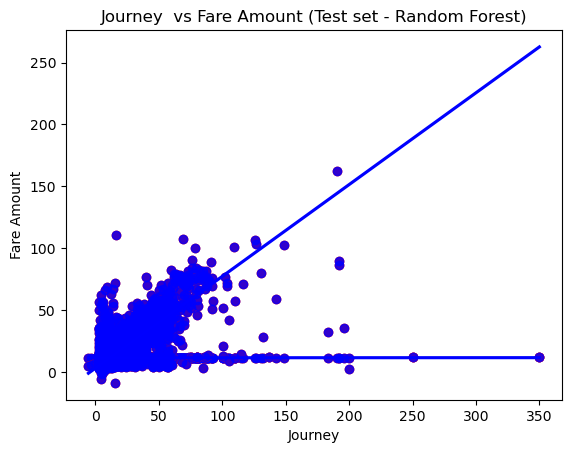

In [1]:
# Multiple Linear Regression and Random Forest model for UBER Dataset

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from numpy import mean
from numpy import std

# Importing the dataset
dataset = pd.read_csv('uber_ride.csv')
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values

# Taking care of missing data or nan value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 0:-1])
X[:, 0:-1] = imputer.transform(X[:, 0:-1])
print(X)


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

'''
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])
print(X_train)
print(X_test)
'''
#corelation between variables
print('Corelation between all the variables in dataset using mean and standard deviation')

print('Training dataset independent variable X: mean=%.3f stdv=%.3f' % (mean(X_train), std(X_train)))
print('Training dataset dependent variable y: mean=%.3f stdv=%.3f' % (mean(y_train), std(y_train)))

print('\nCorelation between all the variables in dataset\n',dataset.corr())


# Training the Multiple Linear Regression model on the Training set
print("\n##########LINEAR REGRESSOR MODEL###############")
from sklearn.linear_model import LinearRegression
LR_regressor = LinearRegression()
LR_regressor.fit(X_train, y_train)

# Predicting the Test set results

y_pred_LR = LR_regressor.predict(X_test)
np.set_printoptions(precision=2)
print("\nPredicted Fare and Actual Fare")
print(np.concatenate((y_pred_LR.reshape(len(y_pred_LR),1), y_test.reshape(len(y_test),1)),1))

# Visualising the y Test set results

plt.scatter(y_test, y_pred_LR, color = 'red')
plt.title('Journey  vs Fare Amount (Test set Linear Regression)')
plt.xlabel('Journey')
plt.ylabel('Fare Amount')
sns.regplot(x=y_test,y=y_pred_LR,ci=None,color='blue')

#Root Mean Squred Error (RSMS) and R2 Error for Linear Regression
# calculate manually
#calculate deviation
d = y_test - y_pred_LR

#Calculate Mean Squred Error
mse_f = np.mean(d**2)
print("Mean Squred Error using Linear Regression:",mse_f)

#Calculate Root Mean Squred Error
rmse_f = np.sqrt(mse_f)
print("Root Mean Squred Error using Linear Regression:",rmse_f)

#Calculate Root Squred Error
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))
print("Root Squred Error using Linear Regression:",r2_f)

# Training the Random Forest Regression model on the whole dataset
print("\n##########RANDOM FOREST MODEL###############")
from sklearn.ensemble import RandomForestRegressor
RF_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
RF_regressor.fit(X_train, y_train)


# Predicting the Test set results
y_pred_RF = RF_regressor.predict(X_test)
np.set_printoptions(precision=2)
print("\nPredicted Fare and Actual Fare")
print(np.concatenate((y_pred_RF.reshape(len(y_pred_RF),1), y_test.reshape(len(y_test),1)),1))

# Visualising the y Test set results
plt.scatter(y_test, y_pred_RF, color = 'red')
plt.title('Journey  vs Fare Amount (Test set - Random Forest)')
plt.xlabel('Journey')
plt.ylabel('Fare Amount')
sns.regplot(x=y_test,y=y_pred_RF,ci=None,color='blue')

#Root Mean Squred Error (RSMS) and R2 Error for Random Forest
# calculate manually
#calculate deviation
d = y_test - y_pred_RF

#Calculate Mean Squred Error
mse_f = np.mean(d**2)
print("Mean Squred Error using Random Forest:",mse_f)

#Calculate Root Mean Squred Error
rmse_f = np.sqrt(mse_f)
print("Root Mean Squred Error using Random Forest:",rmse_f)

#Calculate Root Squred Error
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))
print("Root Squred Error using Random Forest:",r2_f)